In [4]:
import pandas as pd
import numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
data_BTC= pd.read_csv('bitc.csv')
data_BTC.columns

Index(['Date_Time', 'Price'], dtype='object')

In [5]:
def to_date(date):
    return date.date()

data_BTC['Date_Time'] = pd.to_datetime(data_BTC['Date_Time'],format = "%Y-%m-%d %H:%M:%S")
data_BTC['Date_Time'] = data_BTC['Date_Time'].apply(to_date)
data_BTC = data_BTC.iloc[389:1332]

In [6]:
data_BTC = data_BTC.reset_index()
data_BTC = data_BTC.drop(["index"],axis=1)
data_BTC

,Date_Time,Price
0,2012-10-02,12.880000
1,2012-10-04,13.089900
2,2012-10-06,12.899990
3,2012-10-08,12.080000
4,2012-10-10,12.150000
5,2012-10-12,12.150000
6,2012-10-14,12.000000
7,2012-10-16,11.990000
8,2012-10-18,11.959980
9,2012-10-20,11.850000


In [7]:
data_Temp= pd.read_csv('temperature.csv')

In [8]:
data_Temp = data_Temp.iloc[1:]
data_Temp['datetime'] = pd.to_datetime(data_Temp['datetime'],format = "%Y-%m-%d %H:%M:%S")

In [9]:
data_Temp['datetime'] = data_Temp['datetime'].apply(to_date)

In [10]:
data_Temp_copy = data_Temp.columns.tolist()

In [11]:
data_Temp_copy.remove('Seattle')
data_Temp_copy.remove('Boston')
data_Temp_copy.remove('datetime')

In [12]:
data_Temp = data_Temp.drop(data_Temp_copy,axis = 1)

In [13]:
data_Temp = data_Temp.groupby('datetime').mean()

In [14]:
data_Temp = data_Temp[1:1886]

In [15]:
data_Temp = data_Temp.reset_index()
data_Temp
for i in range(0,1884):
    if i % 2 != 0:
        data_Temp = data_Temp.drop([i])

data_Temp = data_Temp.reset_index()
data_Temp = data_Temp.drop(["index"],axis=1)
data_Temp

,datetime,Seattle,Boston
0,2012-10-02,285.156888,289.013090
1,2012-10-04,284.391667,290.043750
2,2012-10-06,285.674583,291.148958
3,2012-10-08,287.144167,283.807917
4,2012-10-10,285.961250,284.467917
5,2012-10-12,283.652500,284.450417
6,2012-10-14,286.050000,277.900833
7,2012-10-16,286.857500,291.565417
8,2012-10-18,282.660833,280.244167
9,2012-10-20,286.063333,286.924583


In [16]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth =5, min_samples_split =10, min_samples_leaf=10)
clf = clf.fit(data_BTC[["Price"]],data_Temp[["Seattle"]] )
clf

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("tree.pdf")

True

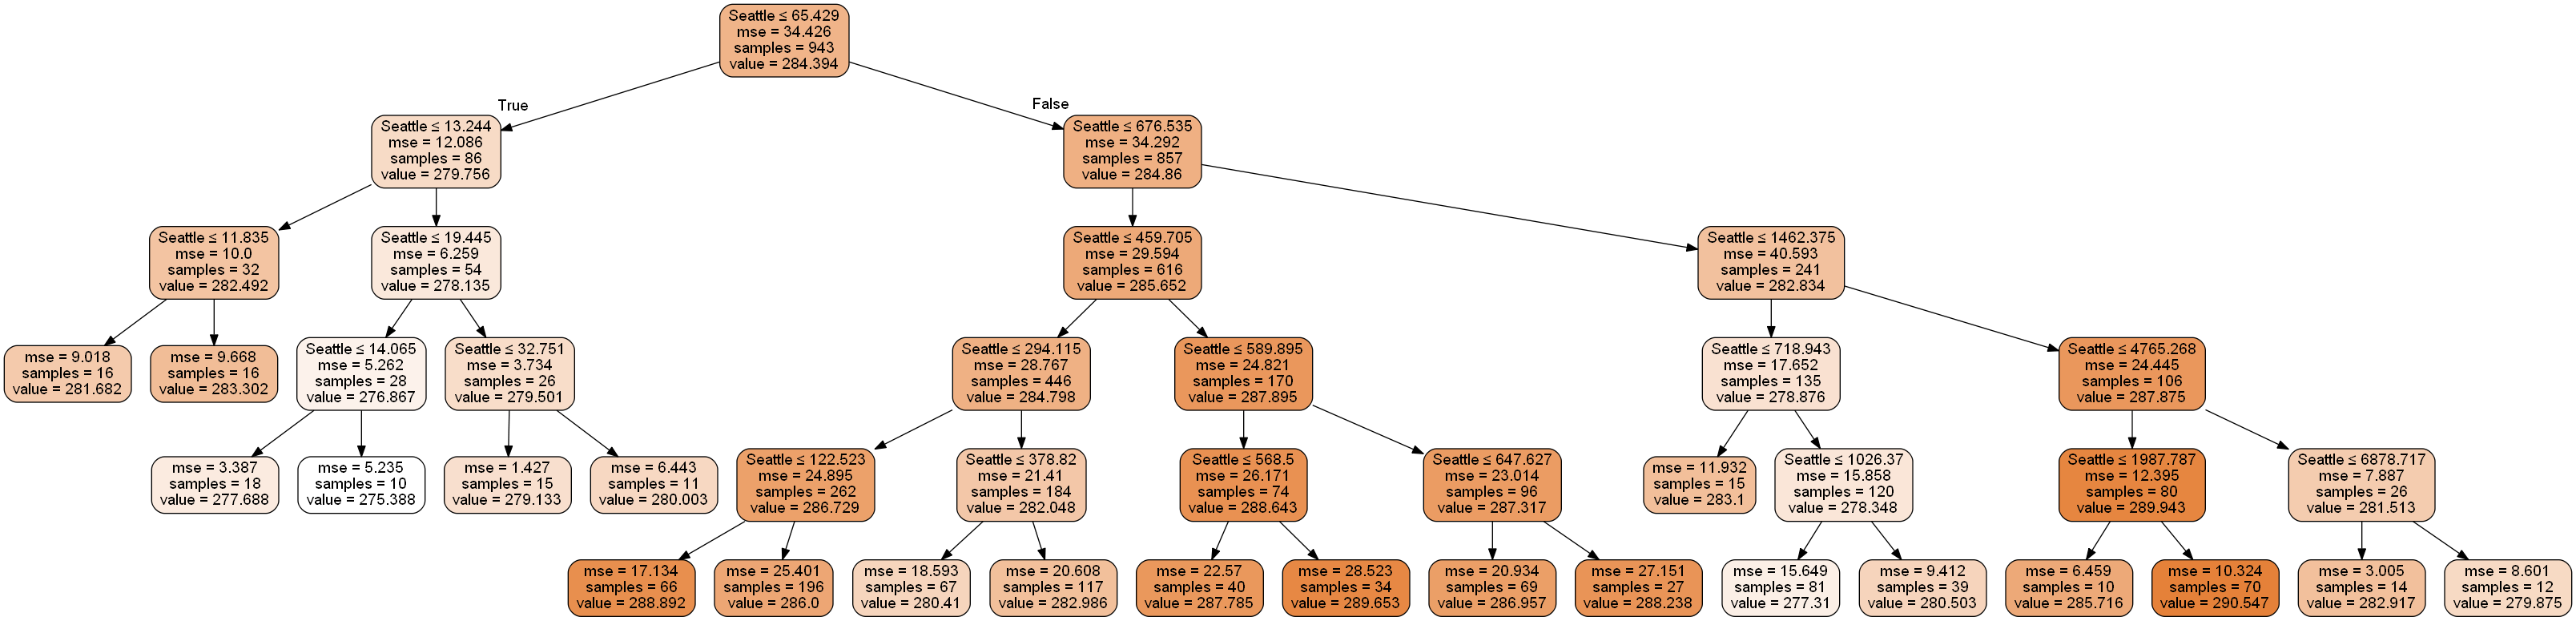

In [18]:
from IPython.display import Image  
 
dot_data = tree.export_graphviz(clf, out_file=None, class_names=["Price"],  
                         feature_names=["Seattle"], filled=True, rounded=True, special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [26]:
clf.predict(data_Temp[["Seattle"]])

array([ 286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000912,
        286.00000912,  286.00000912,  286.00000912,  286.00000

In [43]:
from sklearn.svm import SVR
model = SVR(kernel='linear', cache_size=700)
X = data_Temp[["Seattle"]].as_matrix()
Y = data_BTC["Price"].as_matrix()

In [44]:
from sklearn.cross_validation import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [45]:
#Y_train = Y_train.reshape(-1,1)

In [46]:
model.fit(X_train,Y_train)

SVR(C=1.0, cache_size=700, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
from sklearn import svm
X = data_Temp[["Seattle"]].as_matrix()
Y = data_BTC["Price"].as_matrix().ravel()
# SVM regularization parameter
C = 1

svr = svm.SVR(kernel='linear', C=C).fit(X, Y)

In [48]:
X.shape

(943, 1)

In [49]:
Y.shape

(943,)

In [50]:
y_lin = svr.fit(X, Y).predict(X)

In [51]:
X.shape

(943, 1)

In [52]:
y_lin.shape

(943,)

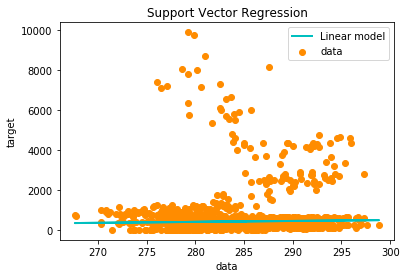

In [53]:
lw = 2
plt.scatter(X, Y, color='darkorange', label='data')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()